In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

In [3]:
df = pd.read_excel('./puntos_vel.xlsx')
df.head()

,POS_1_X,POS_1_Y,POS_2_X,POS_2_Y,POS_3_X,POS_3_Y,POS_4_X,POS_4_Y,POS_5_X,POS_5_Y,POS_6_X,POS_6_Y,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,119,556,655,462,2080,841,2549,744,2882,666,3123,610,NaN,NaN,NaN,NaN,NaN,NaN
1,126,561,665,467,2104,850,2570,750,2900,670,3138,614,NaN,NaN,NaN,NaN,NaN,NaN
2,135,569,677,472,2126,858,2593,756,2921,675,3156,618,NaN,NaN,NaN,NaN,NaN,NaN
3,145,577,687,477,2148,866,2617,762,2944,681,3176,622,NaN,NaN,NaN,NaN,NaN,NaN
4,154,585,698,482,2171,875,2640,768,2965,686,3196,626,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Eliminamos todas las columnas con vacios
df = df.dropna(axis=1, how='any')
df.head()

,POS_1_X,POS_1_Y,POS_2_X,POS_2_Y,POS_3_X,POS_3_Y,POS_4_X,POS_4_Y,POS_5_X,POS_5_Y,POS_6_X,POS_6_Y
0,119,556,655,462,2080,841,2549,744,2882,666,3123,610
1,126,561,665,467,2104,850,2570,750,2900,670,3138,614
2,135,569,677,472,2126,858,2593,756,2921,675,3156,618
3,145,577,687,477,2148,866,2617,762,2944,681,3176,622
4,154,585,698,482,2171,875,2640,768,2965,686,3196,626


In [5]:
# los valores en las columnas POS_3_X, POS_4_X POS_5_X y POS_6_X estan escalados a 4160, vamos a cambiar su escala a 1920

df['POS_3_X'] = (df['POS_3_X'] / 4160 * 1920).astype(int)
df['POS_4_X'] = (df['POS_4_X'] / 4160 * 1920).astype(int)
df['POS_5_X'] = (df['POS_5_X'] / 4160 * 1920).astype(int)
df['POS_6_X'] = (df['POS_6_X'] / 4160 * 1920).astype(int)

# ahora los valores de las columnas POS_3_Y, POS_4_Y POS_5_Y y POS_6_Y estan escalados a 2340, vamos a cambiar su escala a 1080

df['POS_3_Y'] = (df['POS_3_Y'] / 2340 * 1080).astype(int)
df['POS_4_Y'] = (df['POS_4_Y'] / 2340 * 1080).astype(int)
df['POS_5_Y'] = (df['POS_5_Y'] / 2340 * 1080).astype(int)
df['POS_6_Y'] = (df['POS_6_Y'] / 2340 * 1080).astype(int)

df.head()

,POS_1_X,POS_1_Y,POS_2_X,POS_2_Y,POS_3_X,POS_3_Y,POS_4_X,POS_4_Y,POS_5_X,POS_5_Y,POS_6_X,POS_6_Y
0,119,556,655,462,960,388,1176,343,1330,307,1441,281
1,126,561,665,467,971,392,1186,346,1338,309,1448,283
2,135,569,677,472,981,396,1196,348,1348,311,1456,285
3,145,577,687,477,991,399,1207,351,1358,314,1465,287
4,154,585,698,482,1002,403,1218,354,1368,316,1475,288


In [6]:
# Hallaremos los ppm respectoa  dos posiciones consecutivas

df['ppm_1'] = np.sqrt((df['POS_1_X'] - df['POS_2_X'])**2+(df['POS_1_Y'] - df['POS_2_Y'])**2)/4
df['ppm_2'] = np.sqrt((df['POS_2_X'] - df['POS_3_X'])**2+(df['POS_2_Y'] - df['POS_3_Y'])**2)/4
df['ppm_3'] = np.sqrt((df['POS_3_X'] - df['POS_4_X'])**2+(df['POS_3_Y'] - df['POS_4_Y'])**2)/4
df['ppm_4'] = np.sqrt((df['POS_4_X'] - df['POS_5_X'])**2+(df['POS_4_Y'] - df['POS_5_Y'])**2)/4
df['ppm_5'] = np.sqrt((df['POS_5_X'] - df['POS_6_X'])**2+(df['POS_5_Y'] - df['POS_6_Y'])**2)/4



df.head()

,POS_1_X,POS_1_Y,POS_2_X,POS_2_Y,POS_3_X,POS_3_Y,POS_4_X,POS_4_Y,POS_5_X,POS_5_Y,POS_6_X,POS_6_Y,ppm_1,ppm_2,ppm_3,ppm_4,ppm_5
0,119,556,655,462,960,388,1176,343,1330,307,1441,281,136.045029,78.462172,55.159428,39.537956,28.501096
1,126,561,665,467,971,392,1186,346,1338,309,1448,283,136.783817,78.764284,54.966467,39.109622,28.257742
2,135,569,677,472,981,396,1196,348,1348,311,1456,285,137.652870,78.339007,55.073247,39.109622,27.771388
3,145,577,687,477,991,399,1207,351,1358,314,1465,287,137.786973,78.461774,55.317267,38.866760,27.588494
4,154,585,698,482,1002,403,1218,354,1368,316,1475,288,138.416265,78.524280,55.372037,38.684622,27.650723


In [7]:
# Hallamos el punto medio representativo de cada tramo

df['POS_1_X_medio'] = df.apply(lambda x: (x['POS_1_X']+x['POS_2_X'])/2, axis=1).astype(int)
df['POS_1_Y_medio'] = df.apply(lambda x: (x['POS_1_Y']+x['POS_2_Y'])/2, axis=1).astype(int)
df['POS_2_X_medio'] = df.apply(lambda x: (x['POS_2_X']+x['POS_3_X'])/2, axis=1).astype(int)
df['POS_2_Y_medio'] = df.apply(lambda x: (x['POS_2_Y']+x['POS_3_Y'])/2, axis=1).astype(int)
df['POS_3_X_medio'] = df.apply(lambda x: (x['POS_3_X']+x['POS_4_X'])/2, axis=1).astype(int)
df['POS_3_Y_medio'] = df.apply(lambda x: (x['POS_3_Y']+x['POS_4_Y'])/2, axis=1).astype(int)
df['POS_4_X_medio'] = df.apply(lambda x: (x['POS_4_X']+x['POS_5_X'])/2, axis=1).astype(int)
df['POS_4_Y_medio'] = df.apply(lambda x: (x['POS_4_Y']+x['POS_5_Y'])/2, axis=1).astype(int)
df['POS_5_X_medio'] = df.apply(lambda x: (x['POS_5_X']+x['POS_6_X'])/2, axis=1).astype(int)
df['POS_5_Y_medio'] = df.apply(lambda x: (x['POS_5_Y']+x['POS_6_Y'])/2, axis=1).astype(int)

# Eliminamos las columnas iniciales
df = df.drop(['POS_1_X', 'POS_1_Y', 'POS_2_X', 'POS_2_Y', 'POS_3_X', 'POS_3_Y', 'POS_4_X', 'POS_4_Y', 'POS_5_X', 'POS_5_Y', 'POS_6_X', 'POS_6_Y'], axis=1)

df.head()

,ppm_1,ppm_2,ppm_3,ppm_4,ppm_5,POS_1_X_medio,POS_1_Y_medio,POS_2_X_medio,POS_2_Y_medio,POS_3_X_medio,POS_3_Y_medio,POS_4_X_medio,POS_4_Y_medio,POS_5_X_medio,POS_5_Y_medio
0,136.045029,78.462172,55.159428,39.537956,28.501096,387,509,807,425,1068,365,1253,325,1385,294
1,136.783817,78.764284,54.966467,39.109622,28.257742,395,514,818,429,1078,369,1262,327,1393,296
2,137.652870,78.339007,55.073247,39.109622,27.771388,406,520,829,434,1088,372,1272,329,1402,298
3,137.786973,78.461774,55.317267,38.866760,27.588494,416,527,839,438,1099,375,1282,332,1411,300
4,138.416265,78.524280,55.372037,38.684622,27.650723,426,533,850,442,1110,378,1293,335,1421,302


In [8]:
# Juntamos ppm_1, ppm_2, ppm_3, ppm_4 y ppm_5, de mi dataframe 'df' en un nuevo dataframe llamado 'ppm' en una sola columna
ppm = pd.DataFrame()
ppm['ppm'] = pd.concat([df['ppm_1'], df['ppm_2'], df['ppm_3'], df['ppm_4'], df['ppm_5']], axis=0)
ppm['POS_X'] = pd.concat([df['POS_1_X_medio'], df['POS_2_X_medio'], df['POS_3_X_medio'], df['POS_4_X_medio'], df['POS_5_X_medio']], axis=0)
ppm['POS_Y'] = pd.concat([df['POS_1_Y_medio'], df['POS_2_Y_medio'], df['POS_3_Y_medio'], df['POS_4_Y_medio'], df['POS_5_Y_medio']], axis=0)

ppm.head()



,ppm,POS_X,POS_Y
0,136.045029,387,509
1,136.783817,395,514
2,137.652870,406,520
3,137.786973,416,527
4,138.416265,426,533


In [9]:
# Buscamos una modelo polinomial que prediga el valor de ppm en funcion a x e y
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Creamos el modelo polinomial
poly_reg = PolynomialFeatures(degree=2)

# Transformamos los valores de x e y a un polinomio de grado 2
X_poly = poly_reg.fit_transform(ppm[['POS_X', 'POS_Y']])
X_poly

# Creamos el modelo de regresión lineal
lin_reg = LinearRegression()

# Entrenamos el modelo con los valores de ppm
lin_reg.fit(X_poly, ppm['ppm'])

# Calculamos el valor de ppm para cada punto
ppm['ppm_pred'] = lin_reg.predict(X_poly)

# Mostramos el dataframe
ppm

,ppm,POS_X,POS_Y,ppm_pred
0,136.045029,387,509,138.657780
1,136.783817,395,514,138.871584
2,137.652870,406,520,138.983219
3,137.786973,416,527,139.434365
4,138.416265,426,533,139.674644
...,...,...,...,...
19,24.842001,1573,336,26.484157
20,24.755050,1584,339,26.416719
21,24.608180,1595,341,26.255729
22,24.374679,1606,344,26.199110


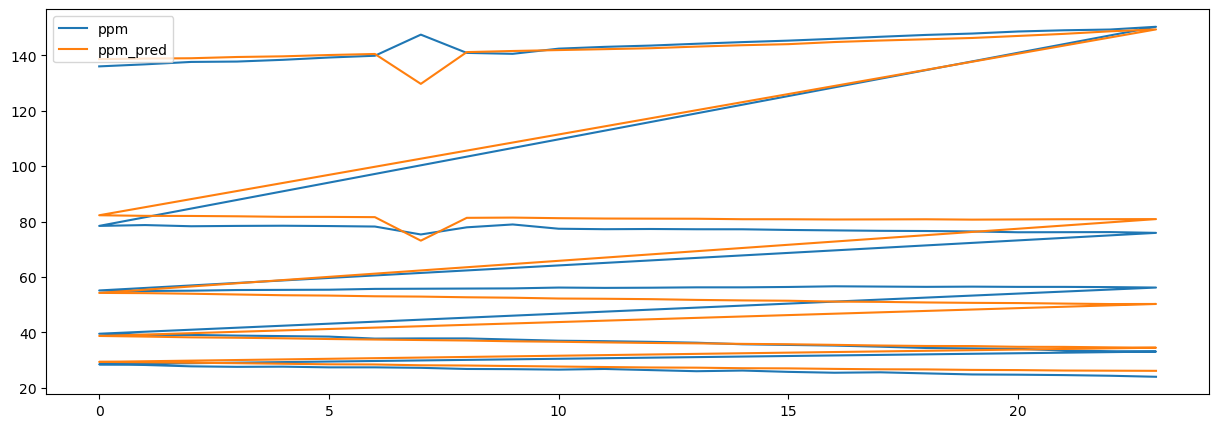

Coeficientes:  [ 0.00000000e+00 -1.01719891e-01  9.33492696e-02  2.79547053e-05
 -5.81660351e-05  1.44215481e-04]
Intercepto:  100.41608034209453
R2:  0.9942659984648309


In [10]:
#  Graficamos los valores de ppm y ppm_pred
plt.figure(figsize=(15, 5))
plt.plot(ppm['ppm'], label='ppm')
plt.plot(ppm['ppm_pred'], label='ppm_pred')
plt.legend()
plt.show()

# mostramos los coeficientes del modelo
print('Coeficientes: ', lin_reg.coef_)
print('Intercepto: ', lin_reg.intercept_)
print('R2: ', lin_reg.score(X_poly, ppm['ppm']))

# Guardamos el modelo
import pickle

with open('ppm.pkl', 'wb') as file:
    pickle.dump(lin_reg, file)


In [11]:
print('y = {} + {}x + {}y + {}x^2 + {}xy + {}y^2'.format(lin_reg.intercept_, lin_reg.coef_[0], lin_reg.coef_[1], lin_reg.coef_[2], lin_reg.coef_[3], lin_reg.coef_[4]))

# Creamos una funcion que calcule el valor de ppm en funcion a x e y utilizando el modelo
def calcular_ppm(x, y):
    return lin_reg.intercept_ + lin_reg.coef_[0] * x + lin_reg.coef_[1] * y + lin_reg.coef_[2] * x**2 + lin_reg.coef_[3] * x * y + lin_reg.coef_[4] * y**2

y = 100.41608034209453 + 0.0x + -0.10171989075108852y + 0.09334926958208331x^2 + 2.7954705293288538e-05xy + -5.816603513934915e-05y^2


In [12]:

# Cargamos el modelo
with open('ppm.pkl', 'rb') as file:
    modelo = pickle.load(file)

# Calculamos el valor de ppm para un valor de x e y utilizando 'modelo'
modelo.predict(PolynomialFeatures(2).fit_transform([[1148, 489]]))[0]

67.96322304895614